# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it.

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided:
* charges: the medical cost

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions.

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [48]:
# import csv file
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving insurance.csv to insurance (1).csv


In [49]:
# import pandas
import pandas as pd

# read data
df = pd.read_csv('insurance.csv')
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Numerical features**:

```
age (int)
bmi (float)
children (int)
charges (float)
```
**Categorical features**:


```
sex
smoker
region
```





### Q2. Check whether there are missing values in this dataset.

In [73]:
# Find missing values

print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [74]:
# proportion of missing values
print(df.isnull().sum()/df.shape[0])

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


**-- There are no missing values.**

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature.


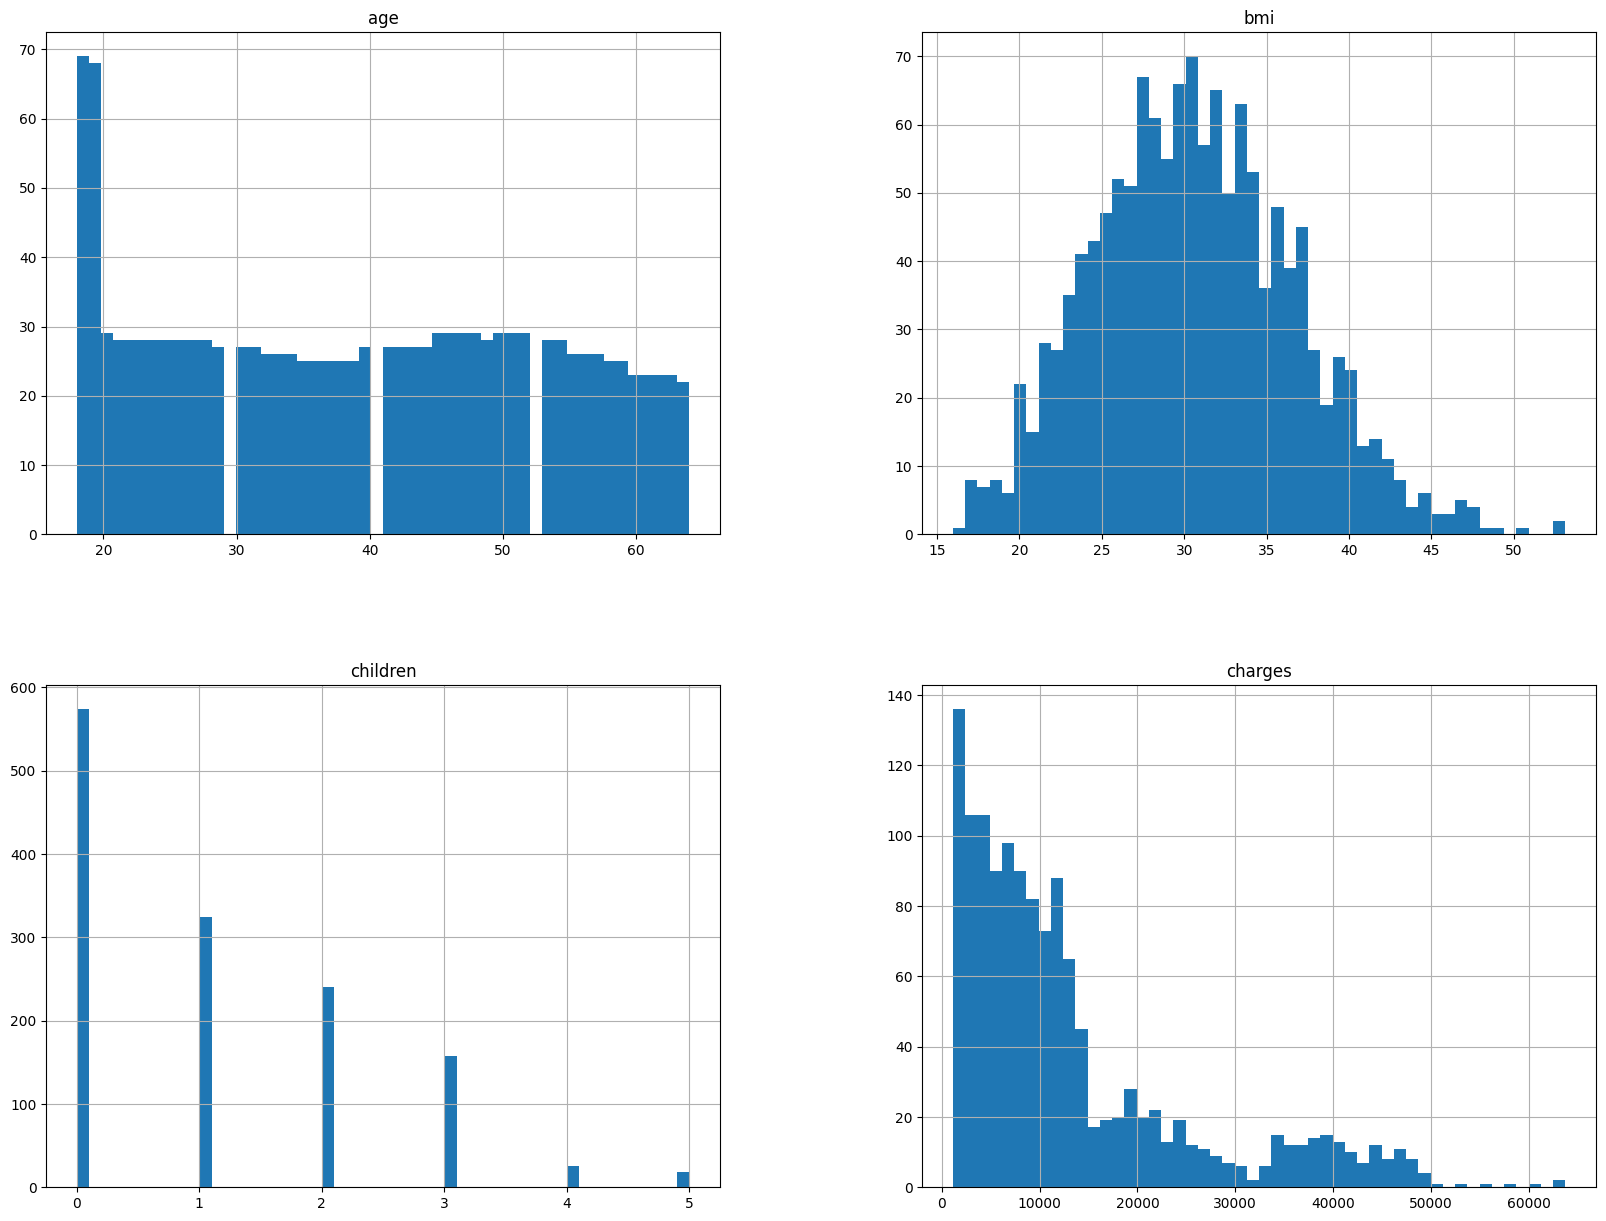

In [53]:
# import matplotlib
import matplotlib.pyplot as plt

# histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [54]:
# correlations
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

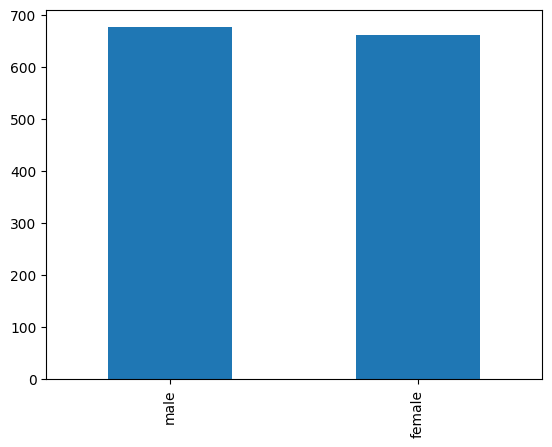

In [55]:
# bar plot (sex)
df['sex'].value_counts().plot(kind = 'bar')
plt.show()

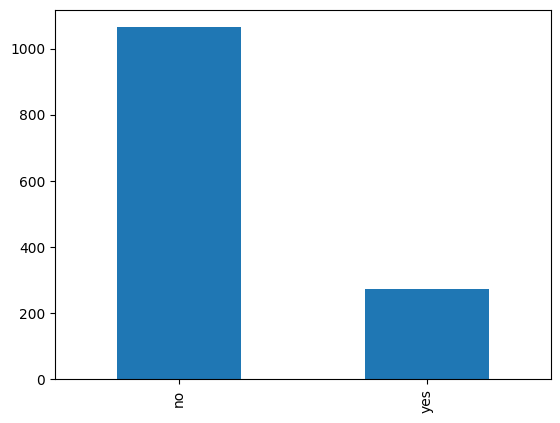

In [56]:
# bar plot (smoker)
df['smoker'].value_counts().plot(kind = 'bar')
plt.show()

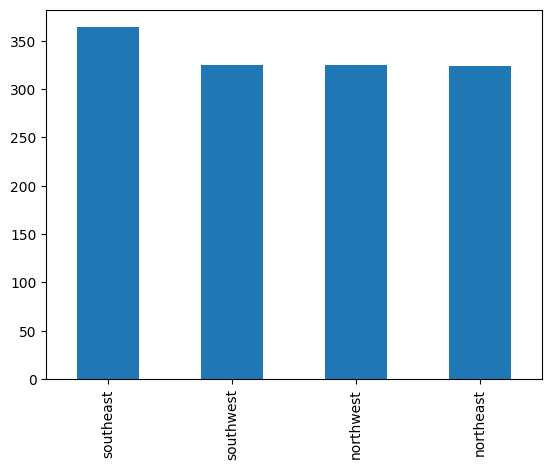

In [57]:
# bar plot (region)
df['region'].value_counts().plot(kind = 'bar')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [58]:
# Label encoding (sex)

from sklearn.preprocessing import LabelEncoder

print(df['sex'].value_counts())

encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])

print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64
1    676
0    662
Name: sex, dtype: int64


In [59]:
# Label encoding (smoker)

print(df['smoker'].value_counts())

encoder = LabelEncoder()
df['smoker'] = encoder.fit_transform(df['smoker'])

print(df['smoker'].value_counts())


no     1064
yes     274
Name: smoker, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64


In [60]:
# Label encoding (region)

print(df['region'].value_counts())

encoder = LabelEncoder()
df['region'] = encoder.fit_transform(df['region'])

print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


### Q7. Normalize all numerical features

In [61]:
# BMI: z-score normalization
import numpy as np

X = df.values[:, 2].astype(dtype=np.float32)
# original data
print(X)

# mean and std
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# scaling data
X = (X-X_mean)/X_std
print(X)

df['bmi'] = X

[27.9  33.77 33.   ... 36.85 25.8  29.07]
[-0.4533  0.5096  0.3833 ...  1.0149 -0.7978 -0.2614]


In [62]:
# Age: min-max normalization
np.set_printoptions(precision=4)

X = df.values[:, 0].astype(dtype=np.float32)
# original data
print(X)

X_min = X.min(axis=0)
X_max = X.max(axis=0)

# min and max
print(X_min)
print(X_max)

# scaling data
X = (X-X_min)/(X_max-X_min)
print(X)

df['age'] = X

[19. 18. 28. ... 18. 21. 61.]
18.0
64.0
[0.0217 0.     0.2174 ... 0.     0.0652 0.9348]


In [63]:
# Children: min-max normalization

X = df.values[:, 3].astype(dtype=np.float32)
# original data
print(X)

X_min = X.min(axis=0)
X_max = X.max(axis=0)

# min and max
print(X_min)
print(X_max)

# scaling data
X = (X-X_min)/(X_max-X_min)
print(X)

df['children'] = X

[0. 1. 3. ... 0. 0. 0.]
0.0
5.0
[0.  0.2 0.6 ... 0.  0.  0. ]


In [64]:
# Charges: min-max normalization
X = df.values[:, 6].astype(dtype=np.float32)
# original data
print(X)

X_min = X.min(axis=0)
X_max = X.max(axis=0)

# min and max
print(X_min)
print(X_max)

# scaling data
X = (X-X_min)/(X_max-X_min)
print(X)

df['charges'] = X

[16884.924   1725.5522  4449.462  ...  1629.8335  2007.945  29141.36  ]
1121.8739
63770.43
[0.2516 0.0096 0.0531 ... 0.0081 0.0141 0.4472]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [75]:
df.to_csv('/content/drive/My Drive/3715_Lab2_InsurancePreProcessed.csv')